In [538]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.io import fits
from scipy import stats
from scipy.stats import binned_statistic
from scipy.linalg import block_diag,eigh
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':16})
from astropy.io import fits
import ebf
import pdb
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import (CartesianRepresentation,CartesianDifferential)
from astropy.coordinates import Galactic

from astropy.coordinates import SkyCoord

In [539]:
import csv
import pandas
from astropy.table import Table, Column, MaskedColumn
from astropy import units as u
import pandas as pd


# This notebook is for investigating the change of the velocity dispersion distribution with respect to the galactic radial radius of the stars 

# Loading Data (5000 BHB Stars from Xue et al. 2011)

In [540]:
t = pandas.read_csv('BHB5000.csv')

#  Setting the minimum and maximum radial radius for the data

In [708]:
zmin = 20
zmax = 100
zlim = 4.

In [709]:
# cutting r and z > 20 & r < 60 kpc stars 
df1=pd.DataFrame()
df2=pd.DataFrame()
df1['x']=t['x'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
df1['y']=t['y'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
df1['z']=t['z'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
df1['Vgal']= t['Vgal'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
df1['r']= t['r'][ (zmin < t['r'] ) & (t['r'] < zmax )]
df2['r']=df1['r'][(np.absolute(df1['z']) > zlim)]
df2['x']=df1['x'][(np.absolute(df1['z']) > zlim)]
df2['y']=df1['y'][(np.absolute(df1['z']) > zlim) ]
df2['z']=df1['z'][(np.absolute(df1['z']) > zlim)]
df2['Vgal']= df1['Vgal'][(np.absolute(df1['z']) > zlim)]

Initial radial distance

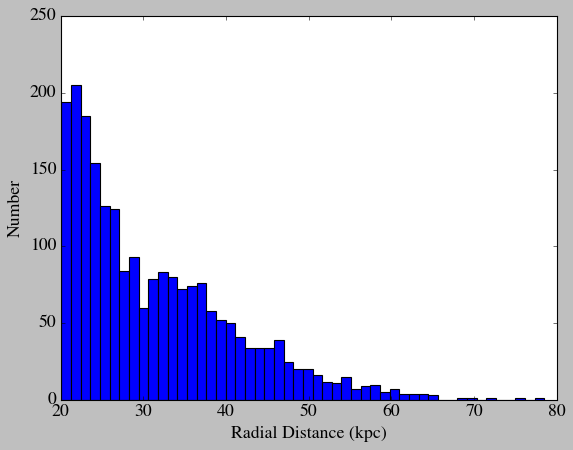

In [704]:
plt.hist(df2['r'],bins=50)
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Number')
plt.show()

In [705]:
#class for the input of the correlation function 
class Comp:
    def __init__(self,x,y,z,rv):
        '''
        class for the input of the correlation function 
        :param x: x position for the target 
        :param y: y position for the target 
        :param z: z position for the target
        :param rv: radial velocity for the target 
        
        '''

        self.x = np.array(x)
        self.y = np.array(y)
        self.z = np.array(z)
        self.rv = np.array(rv)



In [783]:
# Function for calculating the space separation and the velocity difference in each shell

def v_diff(spaces,data,interval):
    
    '''
        :param spaces: Scale for space sparation   
        :param data: The orginal dataset
        :param interval: raidal space interval for the shell of calculating the space separation
   
        
    '''
    
    vdiffh = []
    rlim = []
    num = []
    spect = []
    kk=0
    for ii in range(int(20),int(max(data['r'])),interval):
        
        rlim.append(ii)
        zmin = ii
        zmax = ii+interval
        dfx=pd.DataFrame()
        dfx['x']=data['x'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
        dfx['y']=data['y'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
        dfx['z']=data['z'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
        dfx['Vgal']= data['Vgal'][ (zmin < t['r'] ) & (t['r'] < zmax ) ]
        dfx['r']= data['r'][ (zmin < t['r'] ) & (t['r'] < zmax )]
        dia=[]
        vdiff = []
        spacedt = []
        num.append(len(dfx['r']))
        #calculating the velocity difference and space separation for each shell
        for jj in range(0,len(dfx['r'])): 
            k = Comp(dfx['x'],dfx['y'],dfx['z'],dfx['Vgal'])
            k2 = Comp(data['x'],data['y'],data['z'],data['Vgal'])
            vi = np.repeat(k.rv[jj],len(k2.rv))
            xi = np.repeat(k.x[jj],len(k2.rv))
            yi = np.repeat(k.y[jj],len(k2.rv))
            zi = np.repeat(k.z[jj],len(k2.rv))
        
            diffv = (vi - k2.rv)**2
            diffx = (xi - k2.x)**2
            diffy = (yi - k2.y)**2
            diffz = (zi - k2.z)**2
        
        
            diff = diffv+diffx+diffy+diffz
            spaced = diffx+diffy+diffz
          
            
            dia.append(diff)
            vdiff.append(vi - k2.rv)
            spacedt.append(np.sqrt(spaced))
        
        
        
        
        
        diaf = np.array(dia)[np.triu_indices(len(dfx['r']),1)]
        vdiffto = np.array(vdiff)[np.triu_indices(len(dfx['r']),1)]
        specdto = np.array(spacedt)[np.triu_indices(len(dfx['r']),1)]
        spect.append(specdto)
        
        
        
        vdiffh.append(vdiffto[specdto < spaces[kk]])
       
        kk=kk+1
        
    return rlim,vdiffh,num,spect
        
        
        
        
        
        
    
    

In [784]:
#add other stars in space separations 

#10^-4 1/10000 avoid simulating the disk 
#include and exclude big progenitor to see the change of data

# Results


In [791]:
#width of the steam is 7-8 kpc 
#start scale at 8kpc
#Using averaged space scale calculated from each shell as the space scale (space_sep)
space_sep = [24.02,27.91,31.43,37.41,57.60,65.31,73,80]
rlim,test1,num,sep = v_diff(space_sep,df2,8)

Plotting the histogram for the space separation for each shell (number of the stars in the shell labelled)

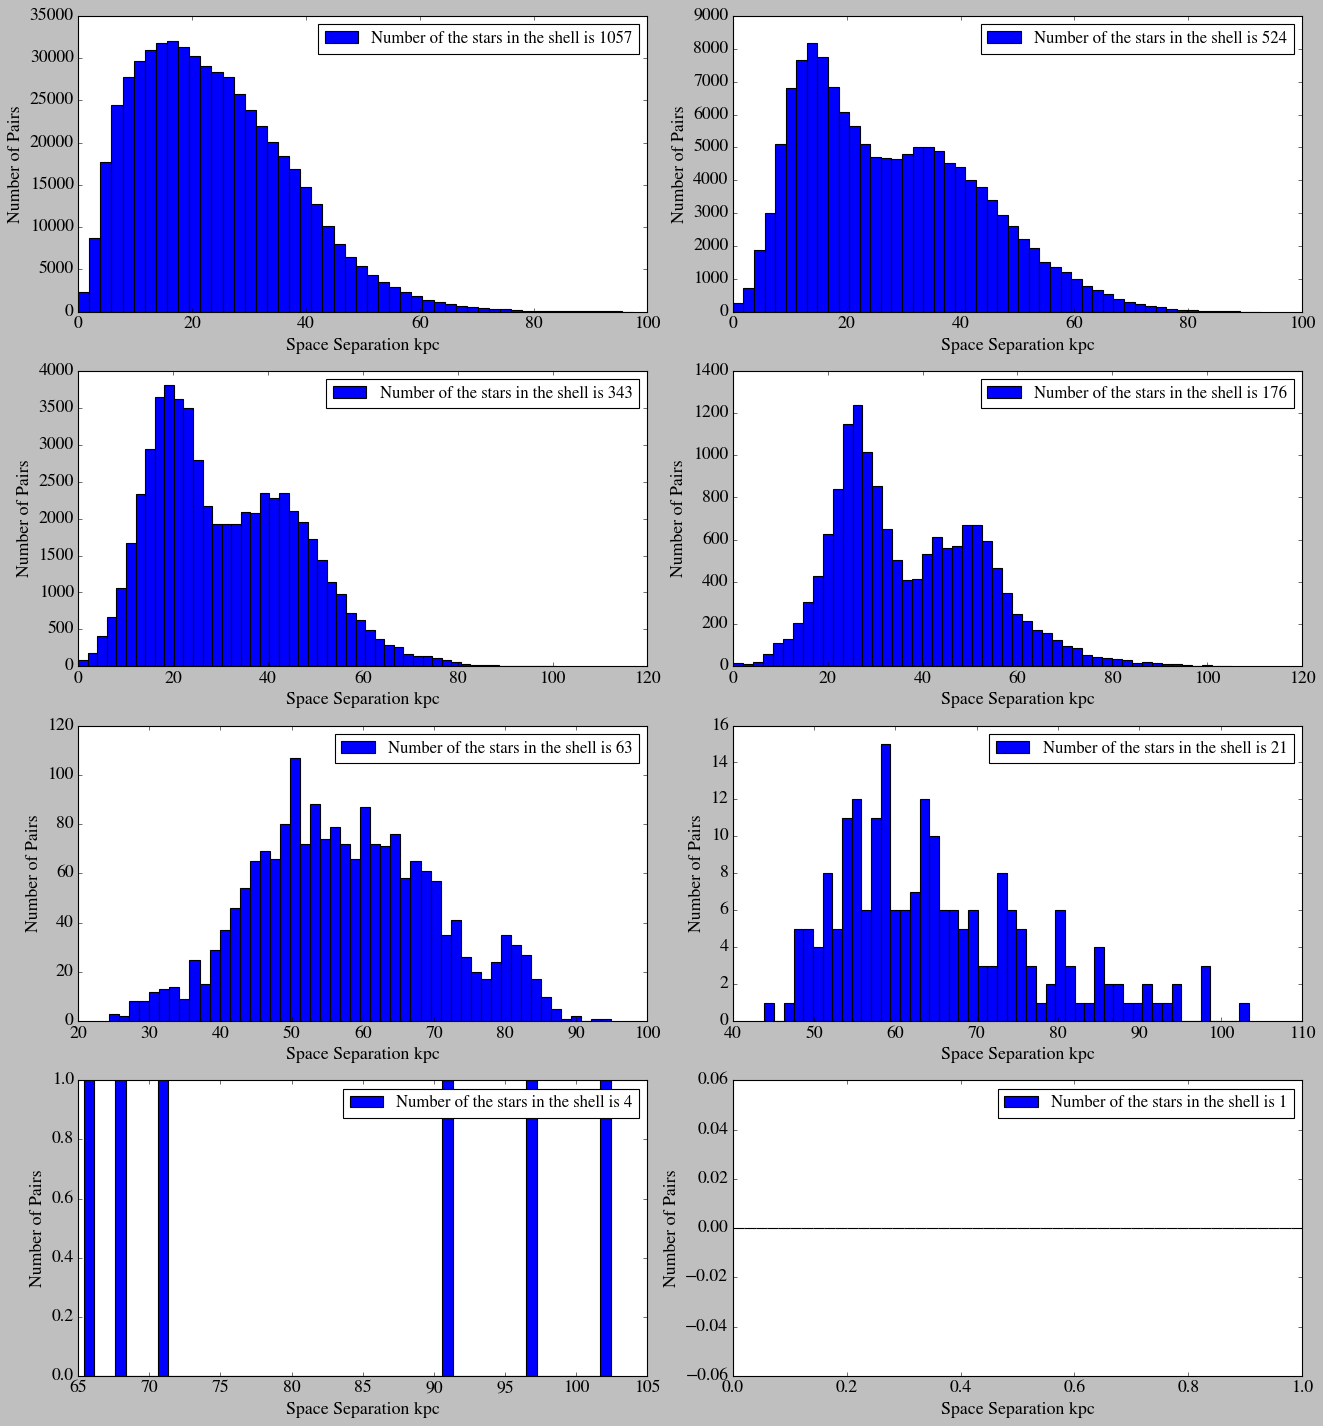

In [789]:
#Plotting the histogram for the space separation for each shell (number of the stars in the shell labelled)

fig, ax = plt.subplots(4, 2, figsize=(18, 20), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=False, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
    
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(sep[k], bins=50, label='Number of the stars in the shell is '+str(num[k]))
            

        ax[index][jndex].set_xlabel('Space Separation kpc')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend( prop={'size': 15})
        
            
            
        k = k + 1
            
plt.show()

Plotting the histogram for the velocity difference for each shell:
1. The width of the velocity dispersion is narrower with respect to increasing of the shell radius 
2. too few stars at r > 68 kpc for data analysis

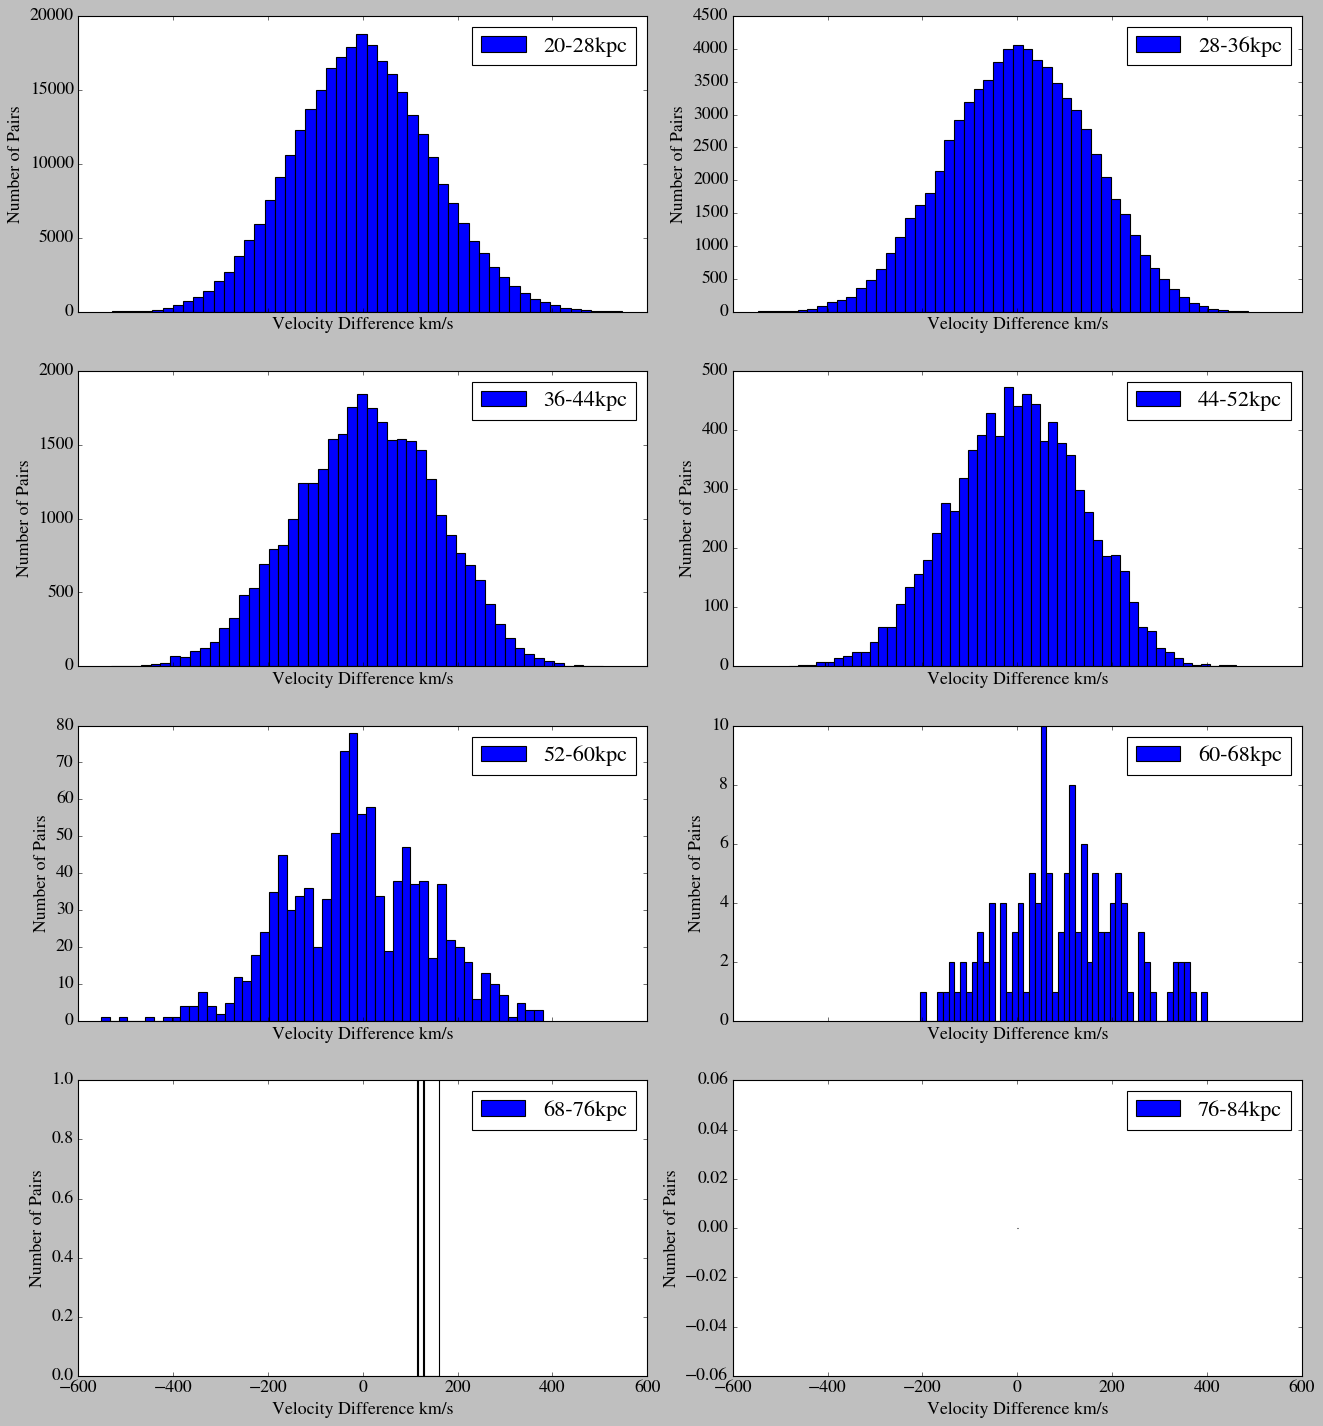

In [792]:



fig, ax = plt.subplots(4, 2, figsize=(18, 20), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
    
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(test1[k], bins=50, label=str(int(rlim[k])) +'-'+ str(int(rlim[k]+8))+'kpc')
            

        ax[index][jndex].set_xlabel('Velocity Difference km/s')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend( prop={'size': 20})
        
            
            
        k = k + 1
            
plt.show()